<a href="https://colab.research.google.com/github/hrishi508/Self-and-Semi-Supervised-Learning/blob/main/ResNet9_Barlow_Twins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import torchvision.transforms as transforms
# from torchviz import make_dot

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive

Mounted at /content/drive


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

## Downloads
Colab deletes all the files created in the '/content' folder when the runtime is recycled, so for the code to run successfully, the model weights and other related files generated during training were uploaded to the drive and are being downloaded here through the code below. This will allow you to verify the accuracy and loss values without having to train the model (it was taking more than 10 mins to train 100 epochs even on gpu)

In [ ]:
############ Download weights
url1  = 'https://docs.google.com/uc?export=download&id=1D7rOGzvDx9C0aQ0QyfE-9tXrFOcalLQf'
url2  = 'https://docs.google.com/uc?export=download&id=1hwx7An0w9QCa1MRiBLmCusRQ-xOm4NO9'
url3  = 'https://docs.google.com/uc?export=download&id=1f-CbOGR3Wp3cmvdxL67Cks1MnyATGCHH'
url4  = 'https://docs.google.com/uc?export=download&id=1WxVWICDdlWhD15aNNeefOQiD_eV1wrkf'
url5  = 'https://docs.google.com/uc?export=download&id=1Me4mQT3aX8REt7uxLBafHEK7hIv8c4Mw'
url6  = 'https://docs.google.com/uc?export=download&id=1bZowR5_wp-UFtC47UWvBrDhI57YFmwxD'
url7  = 'https://docs.google.com/uc?export=download&id=1mcGrRNcvfcMwwl49BgVOpzZct6l4-nw1'
url8  = 'https://docs.google.com/uc?export=download&id=16LAkVsTl9lPpo-HDTZ9eGelz49fNl8Fm'

output1 = '/content/model_1_weights.pth'
output2 = '/content/model_2_weights.pth'
output3 = '/content/model_3_weights.pth'
output4 = '/content/model_4_weights.pth'
output5 = '/content/model_5_weights.pth'
output6 = '/content/model_6_weights.pth'
output7 = '/content/model_7_weights.pth'
output8 = '/content/model_8_weights.pth'

gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)
gdown.download(url4, output4, quiet=True)
gdown.download(url5, output5, quiet=True)
gdown.download(url6, output6, quiet=True)
gdown.download(url7, output7, quiet=True)
gdown.download(url8, output8, quiet=True)


############### Download train_loss
url1  = 'https://docs.google.com/uc?export=download&id=1RdlkJuLNok1M30UQc485c8FSRjqaA_8A'
url2  = 'https://docs.google.com/uc?export=download&id=1bTW3CcKoscshYGp1OEpwWk9AAn1qh8kt'
url3  = 'https://docs.google.com/uc?export=download&id=11xVA5AUR_ENKj9cMj_NCVfqCkxP_yJkk'
url4  = 'https://docs.google.com/uc?export=download&id=1F48Z8vfYAnj0sjb4kA-LW27w5b7DaU0P'
url5  = 'https://docs.google.com/uc?export=download&id=1QeuEa91H9FeO56f_idWq9BVen8tjpUB6'
url6  = 'https://docs.google.com/uc?export=download&id=1heNlgDvALu5w52kI98UN2G8rWuJyjAe8'
url7  = 'https://docs.google.com/uc?export=download&id=1tAzULhoEauICrj2s3eKxMP3XXXp9B6J6'
url8  = 'https://docs.google.com/uc?export=download&id=1JTFTk_YXpAzJk6887UNL_XEBClUWn2k0'

output1 = '/content/train_loss_1.csv'
output2 = '/content/train_loss_2.csv'
output3 = '/content/train_loss_3.csv'
output4 = '/content/train_loss_4.csv'
output5 = '/content/train_loss_5.csv'
output6 = '/content/train_loss_6.csv'
output7 = '/content/train_loss_7.csv'
output8 = '/content/train_loss_8.csv'

gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)
gdown.download(url4, output4, quiet=True)
gdown.download(url5, output5, quiet=True)
gdown.download(url6, output6, quiet=True)
gdown.download(url7, output7, quiet=True)
gdown.download(url8, output8, quiet=True)


################ Download val_loss
url1  = 'https://docs.google.com/uc?export=download&id=1SfSlhjMbWST2oa1sCCmU4NjOBxpTyvHm'
url2  = 'https://docs.google.com/uc?export=download&id=1ZExus5yaRjjC0308hlI-QTeXSptDLYpN'
url3  = 'https://docs.google.com/uc?export=download&id=1FOas39iB0Ssh7EMsm9fGYgTrGlGgadB_'
url4  = 'https://docs.google.com/uc?export=download&id=1gpdN6Na9zPlB1GlD8QRwLpcm5reW7q7K'
url5  = 'https://docs.google.com/uc?export=download&id=11Wr0JcpQUPot4Icole0KB0T_STWsYEYu'
url6  = 'https://docs.google.com/uc?export=download&id=1SyPIrerFUBTMKukfRzRg2en9TrqX0VkR'
url7  = 'https://docs.google.com/uc?export=download&id=1wXorXPGBk1sVPDaC3GdmzoWNII2jJfbn'
url8  = 'https://docs.google.com/uc?export=download&id=1nvzpJa2YyXPQLl4h5Y1-O9YoNj82NItx'

output1 = '/content/val_loss_1.csv'
output2 = '/content/val_loss_2.csv'
output3 = '/content/val_loss_3.csv'
output4 = '/content/val_loss_4.csv'
output5 = '/content/val_loss_5.csv'
output6 = '/content/val_loss_6.csv'
output7 = '/content/val_loss_7.csv'
output8 = '/content/val_loss_8.csv'

gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)
gdown.download(url4, output4, quiet=True)
gdown.download(url5, output5, quiet=True)
gdown.download(url6, output6, quiet=True)
gdown.download(url7, output7, quiet=True)
gdown.download(url8, output8, quiet=True)


################ Download train_acc
url1  = 'https://docs.google.com/uc?export=download&id=1L_pyVnq_tQp_5OxKpzNp6oL-BD8iCZS1'
url2  = 'https://docs.google.com/uc?export=download&id=1fcjl5BEAPWBDkKBrReYxkF5zu22mECr2'
url3  = 'https://docs.google.com/uc?export=download&id=1fwicM5OxQRMfcP9BtEiVgI5ciK1V4hmB'
url4  = 'https://docs.google.com/uc?export=download&id=1SKlbyVVSSzV6aMf0PGXkN6NSgUWGzoua'
url5  = 'https://docs.google.com/uc?export=download&id=1ZfAP_nAnF6z9g_SWaMmPbz8zDxXNAV4R'
url6  = 'https://docs.google.com/uc?export=download&id=1ywe2yk2DYsx2wSPVwNegojms52mIeqzN'
url7  = 'https://docs.google.com/uc?export=download&id=1c8j01sMUpSywrSmW9-snK81jZqqMwVUo'
url8  = 'https://docs.google.com/uc?export=download&id=1S4CuZz60PnnBZocunAkUdBNg7y2YBimu'

output1 = '/content/train_acc_1.csv'
output2 = '/content/train_acc_2.csv'
output3 = '/content/train_acc_3.csv'
output4 = '/content/train_acc_4.csv'
output5 = '/content/train_acc_5.csv'
output6 = '/content/train_acc_6.csv'
output7 = '/content/train_acc_7.csv'
output8 = '/content/train_acc_8.csv'

gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)
gdown.download(url4, output4, quiet=True)
gdown.download(url5, output5, quiet=True)
gdown.download(url6, output6, quiet=True)
gdown.download(url7, output7, quiet=True)
gdown.download(url8, output8, quiet=True)


############## Download val_acc
url1  = 'https://docs.google.com/uc?export=download&id=1OG69gxj2YAmTsBikTTsRgmtk0ybPNLco'
url2  = 'https://docs.google.com/uc?export=download&id=1As1GorC01LBgPKsLWI_RXTf04LKkeqow'
url3  = 'https://docs.google.com/uc?export=download&id=1tJocahrTkFNcnLHMoCcmrR0quzt0Rwil'
url4  = 'https://docs.google.com/uc?export=download&id=1H6CJIFf4KnQMTIbtYS7_Dmy_ph4eS2Jh'
url5  = 'https://docs.google.com/uc?export=download&id=1vXg6VoIDQqMzc3f1p5KApOHa9YCpM347'
url6  = 'https://docs.google.com/uc?export=download&id=1uNvNgsLBbdF4EAeFjg7gszqt7IMdHF2B'
url7  = 'https://docs.google.com/uc?export=download&id=1mMN1JEplGPp_SljhqJEY-YcXpbzxfPD6'
url8  = 'https://docs.google.com/uc?export=download&id=1ucmr0D-kJJn8vrG1CaVRSnrM_7nbhI5I'

output1 = '/content/val_acc_1.csv'
output2 = '/content/val_acc_2.csv'
output3 = '/content/val_acc_3.csv'
output4 = '/content/val_acc_4.csv'
output5 = '/content/val_acc_5.csv'
output6 = '/content/val_acc_6.csv'
output7 = '/content/val_acc_7.csv'
output8 = '/content/val_acc_8.csv'

gdown.download(url1, output1, quiet=True)
gdown.download(url2, output2, quiet=True)
gdown.download(url3, output3, quiet=True)
gdown.download(url4, output4, quiet=True)
gdown.download(url5, output5, quiet=True)
gdown.download(url6, output6, quiet=True)
gdown.download(url7, output7, quiet=True)
gdown.download(url8, output8, quiet=True)

'/content/val_acc_8.csv'

## Data Preparation

Here, we are extracting 500 labelled images from the the training set for the self-supervised learning. Using labelled data sounds counter-intuitive but we are not using the labels in the training of the network, we are only using them for the TSNE visualization of the embedding vectors after every epoch.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),    
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),   
    
])

training_data = datasets.STL10(
    root="data",
    split="train",
    transform=transform,
    download=False
)

# test_data = datasets.STL10(
#     root="data",
#     split='test',
#     transform=transform,
#     download=False
# )

# unlabelled = datasets.STL10(
#     root="data",
#     split="unlabeled",
#     transform=transform,
#     download=False
# )

In [ ]:
labelled_500, _ = torch.utils.data.random_split(training_data, [500, 4500])

In [ ]:
def imshow(imgt):
    img = imgt.clone()
    t1 = torch.tensor([0.485, 0.456, 0.406])
    t2 = torch.tensor([0.229, 0.224, 0.225])
    img[0]*=t2[0]
    img[1]*=t2[1]
    img[2]*=t2[2]

    img[0]+=t1[0]
    img[1]+=t1[1]
    img[2]+=t1[2]

    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

monkey
torch.Size([3, 96, 96])


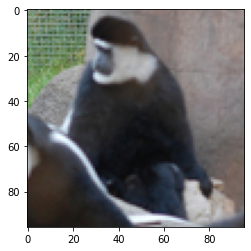

In [ ]:
labels_map = {
    0: "airplane",
    1: "bird",
    2: "car",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "horse",
    7: "monkey",
    8: "ship",
    9: "truck",
}
img, label = training_data[155]
print(labels_map[label])
print(img.shape)
imshow(img)

In [ ]:
## HYPERPARAMETERS
BATCH_SIZE = 64  #64
LR = 0.001      #0.001
EPOCHS = 50

train_dataloader = DataLoader(labelled_500, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
# tf = train_features.unsqueeze(0)
# print(tf.shape)
# print(train_labels)
img = train_features[0]
imshow(img)

## Data Augmentation

We have defined several augmentations, with the hyperparameters taken from the original Work on Barlow Twins.

In [ ]:
def augment(x):
    t = transforms.RandomApply([
        transforms.RandomHorizontalFlip(0.5),
        transforms.RandomRotation(15),
        transforms.GaussianBlur(9, sigma=(0.1, 2.0)),
        transforms.RandomSolarize(0.5, 0.2),
        transforms.ColorJitter(0.4, 0.4, 0.2, 0.1) 
    ], p=0.7)

    im1 = t(x)
    im2 = t(x)

    return im1, im2
    # return x.clone(), x.clone()


In [ ]:
a, b = augment(img)
imshow(a)
imshow(b)

# Train function
This function contains our implementaion of the training pseudocode as given in the paper on Barlow Twins.

In [ ]:
def loss_fn(C, lambd):
    loss = 0
    temp = (C - torch.eye(C.size(0), requires_grad=False).to(device)).pow(2)
    temp2 = temp * ((torch.ones(C.shape, requires_grad=False)-torch.eye(C.size(0), requires_grad=False))*lambd).to(device)
    loss = torch.sum(temp2)
    return loss

In [ ]:
def train_model(model, dataloader, loss_func, optimizer, lambd, num_epochs=100):
    since = time.time()
    model = model.to(device)

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        model.train()  # Set model to training mode

        running_loss = 0.0

            # Iterate over data.
        for inputs, _ in dataloader:
            inputs = inputs.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            ix1, ix2 = augment(inputs)                     
            x1 = torch.squeeze(model(ix1))
            x2 = torch.squeeze(model(ix2))
            # print(x1-x2)

            
            x1 = (x1 - torch.std_mean(x1, 0)[1])/(torch.std_mean(x1, 0)[0] + 1e-9)
            x2 = (x2 - torch.std_mean(x2, 0)[1])/(torch.std_mean(x2, 0)[0] + 1e-9)
            
            C = torch.matmul(x1.T, x2)/len(inputs)
            # print(C)
            # print(C.shape)
            
            loss = loss_func(C, lambd)
            # make_dot(loss, params=dict(list(model_ft.named_parameters()))).render("model_torchviz", format="png")
            # break

            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1000)
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)

        print('Loss: {:.4f}'.format(epoch_loss))

        print()
        e = visualize_embeddings_500(model, dataloader, epoch, "BOTH", False)
        print("Viz done!")
        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    # return model

## Debugging code (ignore)

In [ ]:
# a = torch.tensor([[3,3,3],[3,3,3]]) / torch.tensor([3,3,3])
# a

In [ ]:
# x1 = torch.ones((64,128))*30
# print(x1)
# print(torch.std_mean(x1, 0)[0])
# x1 = (x1 - torch.std_mean(x1, 0)[1])/torch.std_mean(x1, 0)[0]
# print(x1)

In [ ]:
# def set_parameter_requires_grad(model, feature_extracting):
#     if feature_extracting:
#         for param in model.parameters():
            # param.requires_grad = False

# Facebook train function
This function contains Facebook's implementaion of the training pseudocode as given in the paper on Barlow Twins.

In [ ]:
def off_diagonal(x):
    # return a flattened view of the off-diagonal elements of a square matrix
    n, m = x.shape
    assert n == m
    return x.flatten()[:-1].view(n - 1, n + 1)[:, 1:].flatten()

In [ ]:
def train_model_2(model, dataloader, optimizer, lambd, num_epochs=100):
    since = time.time()
    model = model.to(device)

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        model.train()  # Set model to training mode

        running_loss = 0.0

            # Iterate over data.
        for inputs, _ in dataloader:
            inputs = inputs.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            ix1, ix2 = augment(inputs)                     
            x1 = model(ix1)
            x2 = model(ix2)
            # print(x1.shape)
            # print(x1-x2)
            
            m = nn.BatchNorm1d(x1.size(1), affine = False)
            C = (m(x1).T @ m(x2))/len(inputs)
            on_diag = torch.diagonal(C).add_(-1).pow_(2).sum()
            off_diag = off_diagonal(C).pow_(2).sum()
            loss = on_diag + lambd * off_diag
            loss.backward()
            optimizer.step()

            # statistics
            running_loss += loss.item() * inputs.size(0)

        epoch_loss = running_loss / len(dataloader.dataset)

        print('Loss: {:.4f}'.format(epoch_loss))

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))

    return model

## LARS Optimizer implemented by Facebook (only useful for very large batch sizes)
Even a batch size of 256 was causing an out of memory error on colab, so we did not use this optimizer.

In [ ]:
from torch import optim
class LARS(optim.Optimizer):
    def __init__(self, params, lr, weight_decay=0, momentum=0.9, eta=0.001,
                 weight_decay_filter=False, lars_adaptation_filter=False):
        defaults = dict(lr=lr, weight_decay=weight_decay, momentum=momentum,
                        eta=eta, weight_decay_filter=weight_decay_filter,
                        lars_adaptation_filter=lars_adaptation_filter)
        super().__init__(params, defaults)


    def exclude_bias_and_norm(self, p):
        return p.ndim == 1

    @torch.no_grad()
    def step(self):
        for g in self.param_groups:
            for p in g['params']:
                dp = p.grad

                if dp is None:
                    continue

                if not g['weight_decay_filter'] or not self.exclude_bias_and_norm(p):
                    dp = dp.add(p, alpha=g['weight_decay'])

                if not g['lars_adaptation_filter'] or not self.exclude_bias_and_norm(p):
                    param_norm = torch.norm(p)
                    update_norm = torch.norm(dp)
                    one = torch.ones_like(param_norm)
                    q = torch.where(param_norm > 0.,
                                    torch.where(update_norm > 0,
                                                (g['eta'] * param_norm / update_norm), one), one)
                    dp = dp.mul(q)

                param_state = self.state[p]
                if 'mu' not in param_state:
                    param_state['mu'] = torch.zeros_like(p)
                mu = param_state['mu']
                mu.mul_(g['momentum']).add_(dp)

                p.add_(mu, alpha=-g['lr'])

In [ ]:
optimizer = LARS(model_ft.parameters(), lr=0, weight_decay=1e-6,
                     weight_decay_filter=True,
                     lars_adaptation_filter=True)

# ResNet 9 Model

In [ ]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
                nn.BatchNorm2d(out_channels), 
                nn.ReLU(inplace=True)
              ]

    if pool: 
      layers.append(nn.MaxPool2d(2))
    
    return nn.Sequential(*layers)

class ResNet9(nn.Module):

    def __init__(self, in_channels, num_classes):
        super(ResNet9, self).__init__()
        
        self.conv1 = conv_block(in_channels, 64,pool=True)
        self.conv2 = conv_block(64, 128, pool=True) 
        self.res1 = nn.Sequential(conv_block(128, 128), 
                                  conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), 
                                  conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(6), 
                                        nn.Flatten(), 
                                        nn.Dropout(0.2),
                                        nn.Linear(512, 128))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

In [ ]:
model = ResNet9(3, 10)
optimizer = torch.optim.Adam(params=model.parameters(), lr=LR)
print(model)

# PCA function
**visualize_embeddings_100**: This function generates 100 embedding vectors and gives their PCA or TSNE visualization as specified by the user.

**visualize_embeddings_500**: This function generates 500 embedding vectors and gives their PCA or TSNE visualization as specified by the user.

In [ ]:
def visualize_embeddings_100(model_ft, train_dataloader, epoch_number, method = "TSNE", visualize = True, N_components = 2, vector_size = 512, classes = 10):
    cnt = 0
    tmp = [0 for i in range(vector_size)]
    x = [tmp for i in range(1000)]
    vec_cnt = [0 for i in range(classes)]
    i = 0
    principalComponents = None

    model_ft.eval()

    while cnt < 100:

        inputs, labels = next(iter(train_dataloader))
        
        for i in range(BATCH_SIZE):
            if vec_cnt[labels[i]] == 10:
                continue

            if cnt == 100:
                break
            
            input = inputs[i].unsqueeze(0)
            input = input.to(device)
            vec = torch.squeeze(model_ft(input))
            
            x[(labels[i]*10 + vec_cnt[labels[i]])] = vec.detach().numpy()
            vec_cnt[labels[i]] += 1
            cnt += 1


    z = StandardScaler().fit_transform(x)

    if method == "TSNE":
        principalComponents = TSNE(n_components=N_components, learning_rate='auto', init='random').fit_transform(z)
    
    elif method == "PCA":
        pca = PCA(n_components=N_components)
        principalComponents = pca.fit_transform(z)

    elif method == "BOTH":
        principalComponents1 = TSNE(n_components=N_components, learning_rate='auto', init='random').fit_transform(z)

        pca = PCA(n_components=N_components)
        principalComponents2 = pca.fit_transform(z)

        principalDf = pd.DataFrame(data = principalComponents1, columns = ['principal component 1', 'principal component 2'])
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 

        #plt.ylim([-30,30])

        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(method + ' Output', fontsize = 20)
        colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
        k=[0,2,6,8,9]
        n = 10
        for i in range(10):
            ax.scatter(principalDf.loc[range((i*n),((i*n)+n)), 'principal component 1']
                    , principalDf.loc[range((i*n),((i*n)+n)), 'principal component 2']
                    , c = colors[i]
                    , s = 50)

        #ax.legend(targets)
        plt.savefig('TSNE_Output_Epoch_' + str(epoch_no) + '.png')
        plt.close()

        principalDf = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 

        #plt.ylim([-30,30])

        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(method + ' Output', fontsize = 20)
        colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
        k=[0,2,6,8,9]
        n = 10
        for i in range(10):
            ax.scatter(principalDf.loc[range((i*n),((i*n)+n)), 'principal component 1']
                    , principalDf.loc[range((i*n),((i*n)+n)), 'principal component 2']
                    , c = colors[i]
                    , s = 50)

        #ax.legend(targets)
        plt.savefig('PCA_Output_Epoch_' + str(epoch_no) + '.png')
        plt.close()


    if visualize == True:    
        principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 

        #plt.ylim([-30,30])

        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(method + ' Output', fontsize = 20)
        colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
        k=[0,2,6,8,9]
        n = 10
        for i in range(10):
            ax.scatter(principalDf.loc[range((i*n),((i*n)+n)), 'principal component 1']
                    , principalDf.loc[range((i*n),((i*n)+n)), 'principal component 2']
                    , c = colors[i]
                    , s = 50)

        #ax.legend(targets)
        ax.grid()
        plt.savefig('TSNE_Output_Epoch_' + str(epoch_no) + '.png')
        plt.close()

    return x

In [ ]:
def visualize_embeddings_500(model_ft, train_dataloader, epoch_number, method = "TSNE", visualize = True, N_components = 2, vector_size = 512, classes = 10):
    cnt = 0
    tmp = [0 for i in range(vector_size)]
    x = [tmp for i in range(1000)]
    vec_cnt = [0 for i in range(classes)]
    i = 0
    principalComponents = None

    model_ft.eval()

    while cnt < 500:

        inputs, labels = next(iter(train_dataloader))
        # print(labels)
        
        for i in range(BATCH_SIZE):

            if cnt == 500:
                break
            
            input = inputs[i].unsqueeze(0)
            input = input.to(device)
            vec = torch.squeeze(model_ft(input))
            
            # print((labels[i]*100 + vec_cnt[labels[i]]))
            x[(labels[i]*100 + vec_cnt[labels[i]])] = vec.cpu().detach().numpy()
            vec_cnt[labels[i]] += 1
            cnt += 1
            i += 1


    z = StandardScaler().fit_transform(x)

    if method == "TSNE":
        principalComponents = TSNE(n_components=N_components, learning_rate='auto', init='random').fit_transform(z)
    
    elif method == "PCA":
        pca = PCA(n_components=N_components)
        principalComponents = pca.fit_transform(z)

    elif method == "BOTH":
        principalComponents1 = TSNE(n_components=N_components, learning_rate='auto', init='random').fit_transform(z)

        pca = PCA(n_components=N_components)
        principalComponents2 = pca.fit_transform(z)

        principalDf = pd.DataFrame(data = principalComponents1, columns = ['principal component 1', 'principal component 2'])
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 

        #plt.ylim([-30,30])

        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('TSNE Output', fontsize = 20)
        colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
        k=[0,2,6,8,9]
        # n = 10
        for i in range(10):
            ax.scatter(principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 1']
                    , principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 2']
                    , c = colors[i]
                    , s = 25)

        #ax.legend(targets)
        ax.grid()
        plt.savefig('TSNE_Output_Epoch_' + str(epoch_number) + '.png')
        plt.close()

        principalDf = pd.DataFrame(data = principalComponents2, columns = ['principal component 1', 'principal component 2'])
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 

        #plt.ylim([-30,30])

        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('PCA Output', fontsize = 20)
        colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
        k=[0,2,6,8,9]
        # n = 10
        for i in range(10):
            ax.scatter(principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 1']
                    , principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 2']
                    , c = colors[i]
                    , s = 25)

        #ax.legend(targets)
        ax.grid()
        plt.savefig('PCA_Output_Epoch_' + str(epoch_number) + '.png')
        plt.close()

    if visualize == True:
        principalDf = pd.DataFrame(data = principalComponents
                    , columns = ['principal component 1', 'principal component 2'])
        fig = plt.figure(figsize = (8,8))
        ax = fig.add_subplot(1,1,1) 

        #plt.ylim([-30,30])

        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title('TSNE Output', fontsize = 20)
        colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
        k=[0,2,6,8,9]
        # x = 50
        for i in range(10):
            ax.scatter(principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 1']
                    , principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 2']
                    , c = colors[i]
                    , s = 50)

        #ax.legend(targets)
        ax.grid()
        plt.savefig('TSNE_Output_Epoch_' + str(epoch_number) + '.png')
        plt.close()

    return x

In [ ]:
# model = model.to(device)
# p = visualize_embeddings_500(model, train_dataloader, 1, "BOTH", False)

# PCA debugging code (ignore)

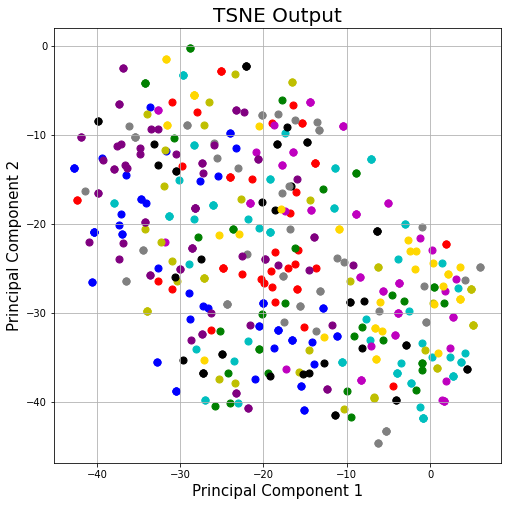

In [ ]:
##### Experiment PCA with 500 samples
# cnt = 0
# i=0
# tmp = [0 for i in range(128)]
# x = [tmp for i in range(1000)]
# vec_cnt = [0 for i in range(10)]

# model_ft.eval()

# while cnt < 500:

#     inputs, labels = next(iter(train_dataloader))
#     # print(labels)
    
#     for i in range(BATCH_SIZE):

#         if cnt == 500:
#             break
        
#         input = inputs[i].unsqueeze(0)
#         input = input.to(device)
#         vec = torch.squeeze(model_ft(input))
        
#         # print((labels[i]*100 + vec_cnt[labels[i]]))
#         x[(labels[i]*100 + vec_cnt[labels[i]])] = vec.detach().numpy()
#         vec_cnt[labels[i]] += 1
#         cnt += 1
#         i += 1

# x = StandardScaler().fit_transform(x)

# principalComponents = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 

# #plt.ylim([-30,30])

# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('TSNE Output', fontsize = 20)
# colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
# k=[0,2,6,8,9]
# x = 50
# for i in range(10):
#     ax.scatter(principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 1']
#                , principalDf.loc[range((i*100),((i*100)+vec_cnt[i])), 'principal component 2']
#                , c = colors[i]
#                , s = 50)

# #ax.legend(targets)
# ax.grid()

In [ ]:
# print(vec_cnt) #Trial 3

[44, 37, 58, 68, 55, 41, 44, 36, 51, 66]


In [ ]:
# print(vec_cnt) #Trial 2

[29, 58, 62, 42, 67, 39, 59, 35, 69, 40]


In [ ]:
# print(vec_cnt) #Trial 1
# print(sum(vec_cnt))

[44, 46, 50, 47, 41, 56, 37, 66, 50, 63]
500


In [ ]:
# ##### PCA from trainloader
# cnt = 0
# i=0
# tmp = [0 for i in range(128)]
# x = [tmp for i in range(100)]
# vec_cnt = [0 for i in range(10)]

# model_ft.eval()

# while cnt < 100:

#     inputs, labels = next(iter(train_dataloader))
    
#     for i in range(BATCH_SIZE):
#         if vec_cnt[labels[i]] == 10:
#             i += 1
#             continue

#         if cnt == 100:
#             break
        
#         input = inputs[i].unsqueeze(0)
#         input = input.to(device)
#         vec = torch.squeeze(model_ft(input))
        
#         x[(labels[i]*10 + vec_cnt[labels[i]])] = vec.detach().numpy()
#         vec_cnt[labels[i]] += 1
#         cnt += 1
#         i += 1

In [ ]:
# ##### PCA from dataset directly
# cnt = 0
# i=0
# x = [[0] for i in range(100)]
# vec_cnt = [0 for i in range(10)]

# model_ft.eval()

# while cnt < 100:

#     input, label = training_data[i]

#     if vec_cnt[label] == 10:
#         i += 1
#         continue
    
#     input = input.unsqueeze(0)
#     input = input.to(device)
#     vec = torch.squeeze(model_ft(input))
    
#     x[(label*10 + vec_cnt[label])] = vec.detach().numpy()
#     vec_cnt[label] += 1
#     cnt += 1
#     i += 1

In [ ]:
# print(vec_cnt)
# # print(x)

[10, 10, 10, 10, 10, 10, 10, 10, 10, 10]


In [ ]:
# temp = []
# for i in range(100):
#     for j in range(128):
#         print(i, j)
#         temp.append(x[i][j])

#     x[i] = temp
#     temp = []

In [ ]:
# print(len(x))

100


In [ ]:
# x = StandardScaler().fit_transform(x)

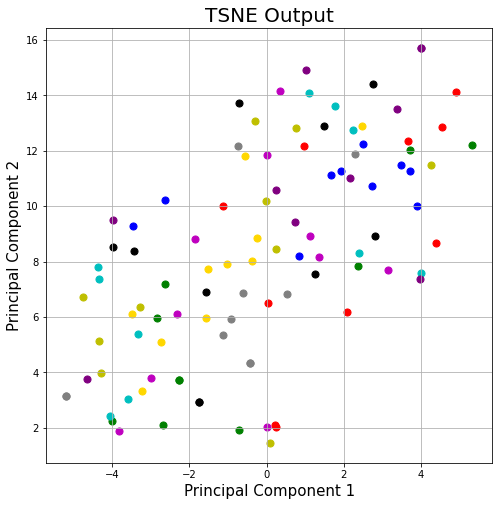

In [ ]:
# #### PCA
# # pca = PCA(n_components=2)
# # principalComponents = pca.fit_transform(x)
# # principalDf = pd.DataFrame(data = principalComponents
# #              , columns = ['principal component 1', 'principal component 2'])
# # fig = plt.figure(figsize = (8,8))
# # ax = fig.add_subplot(1,1,1) 
# # #plt.ylim([-30,30])
# # ax.set_xlabel('Principal Component 1', fontsize = 15)
# # ax.set_ylabel('Principal Component 2', fontsize = 15)
# # ax.set_title('PCA Output', fontsize = 20)
# # colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
# # k=[0,2,6,8,9]
# # x = 10
# # for i in range(10):
# #     ax.scatter(principalDf.loc[range((i*x),((i*x)+x)), 'principal component 1']
# #                , principalDf.loc[range((i*x),((i*x)+x)), 'principal component 2']
# #                , c = colors[i]
# #                , s = 50)
# # #ax.legend(targets)
# # ax.grid()


# #### TSNE
# principalComponents = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
# fig = plt.figure(figsize = (8,8))
# ax = fig.add_subplot(1,1,1) 

# #plt.ylim([-30,30])

# ax.set_xlabel('Principal Component 1', fontsize = 15)
# ax.set_ylabel('Principal Component 2', fontsize = 15)
# ax.set_title('TSNE Output', fontsize = 20)
# colors = ['r', 'g', 'b','c','m','y','k','gold','grey','purple']
# k=[0,2,6,8,9]
# x = 10
# for i in range(10):
#     ax.scatter(principalDf.loc[range((i*x),((i*x)+x)), 'principal component 1']
#                , principalDf.loc[range((i*x),((i*x)+x)), 'principal component 2']
#                , c = colors[i]
#                , s = 50)

# #ax.legend(targets)
# ax.grid()

# Training
**torch.autograd.set_detect_anomaly(True)** was used to trace what part of the code was causing there to be Nan values.

**Error was traced to be:** RuntimeError: Function 'PowBackward0' returned nan values in its 0th output.

In [ ]:
torch.autograd.set_detect_anomaly(True)
train_model(model_ft, train_dataloader, loss_fn, optimizer, lambd=5*1e-3, num_epochs=50) #labmd = 5*1e-3

Epoch 0/49
----------
Loss: 51.6278

Viz done!

Epoch 1/49
----------
Loss: 47.0085

Viz done!

Epoch 2/49
----------
Loss: 41.9588

Viz done!

Epoch 3/49
----------
Loss: 27.4296

Viz done!

Epoch 4/49
----------


RuntimeError: ignored

In [ ]:
torch.save(model_ft.state_dict(), '/content/drive/MyDrive/weights_stl10_self_supervised.pth')